# Aggregating datasets

Exercise: We want to plot surface temperature of different datasets with each other. 

Note; We will be importing datasets from different servers, bear in mind that the granularity (time interval, sensor types) are different and needs to be taken into account when actually comparing these dataset. 

* Location: Location: Oregon Coast. 

* Date range: [2017-01-13 till 2017-01-16], UTC time. 

* Variable: Surface temperature

## OOI temperature dataset - Oregon Coast 2017

Import an OOI dataset. Background on the dataset we are importing [here](https://ooinet.oceanobservatories.org/data_access/?search=CE01ISSM-RID16-03-CTDBPC000) and [here](https://sensors.ioos.us/#metadata/103705/station) :

* Coastal endurance Array
* Platform: Oregon Inshore Surface Monitoring
* Instrument CTD. 

In [1]:
#Import erddap package into 
from erddapy import ERDDAP
# ooi constructor:

e = ERDDAP(
    server= " https://erddap.dataexplorer.oceanobservatories.org/erddap/",
    protocol="tabledap",
    response="csv",
)

e.dataset_id = "ooi-ce01issm-rid16-03-ctdbpc000"
e.variables = [
    "longitude",
    "latitude",
    "time",
    "sea_water_temperature"
]
e.constraints = {
    "time>=": "2017-01-13T00:00:00Z",
    "time<=": "2017-01-16T23:59:59Z",}
print ('done')

done


Check the URL

In [2]:
# Print the URL - check
url = e.get_download_url()
print(url)

 https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issm-rid16-03-ctdbpc000.csv?longitude,latitude,time,sea_water_temperature&time>=1484265600.0&time<=1484611199.0


Import the dataset into the pandas dataframe and check the lay-out

In [3]:
# Convert URL to pandas dataframe
df_ooi_2017 = e.to_pandas( 
    parse_dates=True,
).dropna()

df_ooi_2017.head()
df_ooi_2017

,longitude (degrees_east),latitude (degrees_north),time (UTC),sea_water_temperature (degree_Celsius)
0,-124.09707,44.65678,2017-01-13T00:00:00Z,9.325062
1,-124.09707,44.65678,2017-01-13T00:15:00Z,9.294550
2,-124.09707,44.65678,2017-01-13T01:00:00Z,9.219658
3,-124.09707,44.65678,2017-01-13T01:15:00Z,9.220820
4,-124.09707,44.65678,2017-01-13T02:00:00Z,9.296882
...,...,...,...,...
102,-124.09707,44.65678,2017-01-16T19:35:00Z,8.924600
103,-124.09707,44.65678,2017-01-16T20:35:00Z,8.370100
104,-124.09707,44.65678,2017-01-16T21:35:00Z,8.525400
105,-124.09707,44.65678,2017-01-16T22:35:00Z,8.696400


<AxesSubplot:xlabel='longitude (degrees_east)', ylabel='latitude (degrees_north)'>

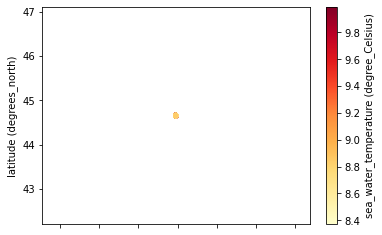

In [5]:
df_ooi_2017.plot (x='longitude (degrees_east)', 
                    y='latitude (degrees_north)', 
                    kind = 'scatter',
                    c='sea_water_temperature (degree_Celsius)', 
                    colormap="YlOrRd")

## OOI temperature dataset 2018 - Oregon Coast

In [7]:
#Import erddap package into 
from erddapy import ERDDAP
# ooi constructor:

e = ERDDAP(
    server= " https://erddap.dataexplorer.oceanobservatories.org/erddap/",
    protocol="tabledap",
    response="csv",
)

e.dataset_id = "ooi-ce01issm-rid16-03-ctdbpc000"
e.variables = [
    "longitude",
    "latitude",
    "time",
    "sea_water_temperature"
]
e.constraints = {
    "time>=": "2018-01-13T00:00:00Z",
    "time<=": "2018-01-13T23:59:59Z",}
print ('done')

done


In [8]:
# Print the URL - check
url = e.get_download_url()
print(url)

 https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issm-rid16-03-ctdbpc000.csv?longitude,latitude,time,sea_water_temperature&time>=1515801600.0&time<=1515887999.0


In [9]:
# Convert URL to pandas dataframe
df_ooi_2018 = e.to_pandas( 
    parse_dates=True,
).dropna()

df_ooi_2018.head()
print (df_ooi_2018)


    longitude (degrees_east)  latitude (degrees_north)            time (UTC)  \
0                 -124.09707                  44.65678  2018-01-13T00:00:00Z   
1                 -124.09707                  44.65678  2018-01-13T00:15:00Z   
2                 -124.09707                  44.65678  2018-01-13T00:30:00Z   
3                 -124.09707                  44.65678  2018-01-13T00:45:00Z   
4                 -124.09707                  44.65678  2018-01-13T01:00:00Z   
..                       ...                       ...                   ...   
91                -124.09707                  44.65678  2018-01-13T22:45:00Z   
92                -124.09707                  44.65678  2018-01-13T23:00:00Z   
93                -124.09707                  44.65678  2018-01-13T23:15:00Z   
94                -124.09707                  44.65678  2018-01-13T23:30:00Z   
95                -124.09707                  44.65678  2018-01-13T23:45:00Z   

    sea_water_temperature (degree_Celsi

# Combining the datasets

averaging the datasets

Convert the objects to datetime objects

In [10]:
import pandas as pd
print (df_ooi_2017.dtypes)
df_ooi_2017["time (UTC)"] = pd.to_datetime (df_ooi_2017["time (UTC)"], format = "%Y-%m-%dT%H:%M:%S")

print (df_ooi_2017.dtypes)

longitude (degrees_east)                              float64
latitude (degrees_north)                              float64
time (UTC)                                datetime64[ns, UTC]
sea_water_temperature (degree_Celsius)                float64
dtype: object
longitude (degrees_east)                              float64
latitude (degrees_north)                              float64
time (UTC)                                datetime64[ns, UTC]
sea_water_temperature (degree_Celsius)                float64
dtype: object


In [11]:
import pandas as pd
print (df_ooi_2018.dtypes)
df_ooi_2018["time (UTC)"] = pd.to_datetime (df_ooi_2018["time (UTC)"], format = "%Y-%m-%dT%H:%M:%S")

print (df_ooi_2017.dtypes)

longitude (degrees_east)                  float64
latitude (degrees_north)                  float64
time (UTC)                                 object
sea_water_temperature (degree_Celsius)    float64
dtype: object
longitude (degrees_east)                              float64
latitude (degrees_north)                              float64
time (UTC)                                datetime64[ns, UTC]
sea_water_temperature (degree_Celsius)                float64
dtype: object


In [12]:
df_ooi_2017_average = df_ooi_2017.groupby(df_ooi_2017["time (UTC)"].dt.hour)['sea_water_temperature (degree_Celsius)'].mean().reset_index()
print (df_ooi_2017_average)

    time (UTC)  sea_water_temperature (degree_Celsius)
0            0                                9.159065
1            1                                9.347407
2            2                                9.255006
3            3                                9.235875
4            4                                9.215852
5            5                                9.293690
6            6                                9.364583
7            7                                9.346318
8            8                                9.622138
9            9                                9.160437
10          10                                9.099738
11          11                                9.168706
12          12                                9.185529
13          13                                9.238513
14          14                                9.201800
15          15                                9.060133
16          16                                9.145973
17        

In [13]:
df_ooi_2018_average = df_ooi_2018.groupby(df_ooi_2018["time (UTC)"].dt.hour)['sea_water_temperature (degree_Celsius)'].mean().reset_index()
print (df_ooi_2018_average)

    time (UTC)  sea_water_temperature (degree_Celsius)
0            0                               10.733158
1            1                               10.720431
2            2                               10.716094
3            3                               10.712079
4            4                               10.704821
5            5                               10.721999
6            6                               10.771977
7            7                               10.826174
8            8                               10.871474
9            9                               10.866186
10          10                               10.867152
11          11                               10.847706
12          12                               10.846491
13          13                               10.790263
14          14                               10.753349
15          15                               10.739398
16          16                               10.909280
17        

(array([ 8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75,
        11.  , 11.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

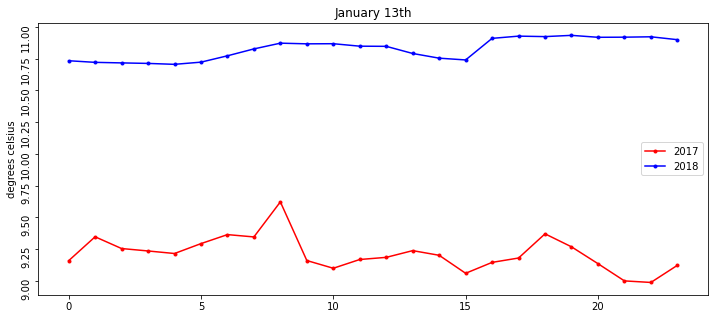

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5)) 
plt.plot(df_ooi_2017_average["time (UTC)"],df_ooi_2017_average["sea_water_temperature (degree_Celsius)"],label='2017',c='red',marker='.',linestyle='-') 
plt.plot(df_ooi_2018_average["time (UTC)"],df_ooi_2018_average["sea_water_temperature (degree_Celsius)"],label='2018',c='blue',marker='.',linestyle='-') 
plt.ylabel('degrees celsius')
plt.title("January 13th")
plt.legend()
plt.yticks(rotation=90)


#fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
#ax1.plot(df_bcodmo["time (UTC)"],df_bcodmo['temperature'],label='bcodmo',c='red',marker='.',linestyle='-')
#ax2.plot(df_ooi["time (UTC)"],df_ooi["sea_water_temperature (degree_Celsius)"],label='OOI',c='blue',marker='.',linestyle='-')
#ax1.set(ylabel='degrees celsius')
#ax2.set(ylabel='degrees celsius')

# Working with gridded data
Gridded data works with a different protocol called griddap. Instead of using the erddapy library. It is easier to import the data in .netcdf using the package xarray and netcdf
Setting the constraints is a bit more straightforward

Gridded data URL: 

xarray works similarly as the pandas data package. 

In [15]:
import xarray as xr

In [16]:
import netCDF4 as nc

 Importing the downloaded data in Python. 
Now that we've downloaded the data locally, we can import it and extract our variables of interest:

In [17]:
import xarray as xr

server = 'https://coastwatch.pfeg.noaa.gov/erddap'
protocol = 'griddap'
dataset_id = "jplG1SST"
full_URL = '/'.join([server,protocol,dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)

https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST


Inspect the dataframe:

In [18]:
print (da)

<xarray.Dataset>
Dimensions:         (latitude: 16000, longitude: 36000, time: 2632)
Coordinates:
  * time            (time) object 2010-06-09 12:00:00 ... 2017-09-13 00:00:00
  * latitude        (latitude) float32 -79.995 -79.985 -79.975 ... 79.985 79.995
  * longitude       (longitude) float32 -179.995 -179.985 ... 179.985 179.995
Data variables:
    SST             (time, latitude, longitude) float32 ...
    mask            (time, latitude, longitude) float32 ...
    analysis_error  (time, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    contact:                    Benyang.Tang@jpl.nasa.gov
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              Benyang.Tang@jpl.nasa.gov
    creator_name:               The JPL G1SST Team
    creator_type:               group
    creator_url:                http://sst.jpl.nasa.gov/SST/
    DSD_entry_id:               JPL_OUROCEAN-L4UHfnd-GLOB-G1SST
    Easternmost_Easting:        1

Getting the dataset without subsetting it creates an error -> the data set is too large to be downloaded completely.

In [19]:
sst = da['SST']
sst

MemoryError: Unable to allocate 5.52 TiB for an array with shape (2632, 16000, 36000) and data type float32

MemoryError: Unable to allocate 5.52 TiB for an array with shape (2632, 16000, 36000) and data type float32

Create subsets of your netcdf file:

For this exercise, the area we are interested in includes Monterey Bay, CA:

- Latitude range: 44.0N, 48.0N
- Longitude range: -128E, -121E
- Time range 2017-01-13T00:00:00Z to 2017-01-16T23:59:59Z

Xarray supports:
- label-based indexing using .sel
- position-based indexing using .isel


slice() function can take three parameters:
- start (optional) - Starting integer where the slicing of the object starts. Default to None if not provided.
- stop - Integer until which the slicing takes place. The slicing stops at index stop -1 (last element).


In [20]:
import xarray as xr

server = 'https://coastwatch.pfeg.noaa.gov/erddap'
protocol = 'griddap'
dataset_id = "jplG1SST"
full_URL = '/'.join([server,protocol,dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)


sst = da['SST'].sel(  
                  latitude=slice(44., 48.),  
                  longitude=slice(-128, -121), 
                  time='2017-01-13T00:00:00'
                 )
sst



https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST


<xarray.DataArray 'SST' (time: 1, latitude: 400, longitude: 700)>
[280000 values with dtype=float32]
Coordinates:
  * time       (time) object 2017-01-13 00:00:00
  * latitude   (latitude) float32 44.005 44.015 44.025 ... 47.975 47.985 47.995
  * longitude  (longitude) float32 -127.995 -127.985 ... -121.015 -121.005
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    long_name:        Analysed Sea Surface Temperature
    standard_name:    sea_surface_temperature
    type:             foundation
    units:            degree_C
    valid_max:        45.0
    valid_min:        -9.0

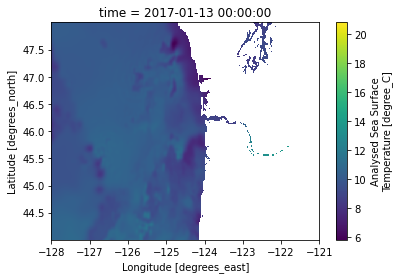

In [21]:
%matplotlib inline
sst.isel(time=0).plot.imshow()